# SYDE 673 Final Project
## Data Preprocessing on the GTSRB

Author: Travis Morton

Course: SYDE 673 Winter 2021

Date: 4/25/2021

# Set Drive and Colab settings

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Apr 25 17:13:51 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!nvidia-smi -L

GPU 0: Tesla V100-SXM2-16GB (UUID: GPU-d1f02a9f-27cc-7e27-7213-b895ddf92760)


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 38.0 gigabytes of available RAM

You are using a high-RAM runtime!


# Import Data

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks/Kaggle"
# /content/gdrive/My Drive/Colab Notebooks/Kaggle is the path where kaggle.json is present in the Google Drive
print("ok")
%cd /content/gdrive/My Drive/Colab Notebooks/Kaggle

ok
/content/gdrive/My Drive/Colab Notebooks/Kaggle


In [ ]:
#Download the GTSRB data and unzip
download = True
if download:
  !kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
  !unzip gtsrb-german-traffic-sign.zip  && rm *.zip
!ls

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  inflating: train/5/00005_00054_00001.png  
  inflating: train/5/00005_00054_00002.png  
  inflating: train/5/00005_00054_00003.png  
  inflating: train/5/00005_00054_00004.png  
  inflating: train/5/00005_00054_00005.png  
  inflating: train/5/00005_00054_00006.png  
  in

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
from PIL import Image

import warnings
import matplotlib.pyplot as plt
import random
warnings.filterwarnings("ignore")

In [ ]:
#Kaggle import method referenced from: https://www.kaggle.com/marinovik/recognizing-traffic-signals-with-keras-cnn 

start = time.time()
input_path = "/content/gdrive/My Drive/Colab Notebooks/Kaggle/"

# Create two sets for data and labels
image_data = []
image_labels = []

# Number of classes
total_classes = 43

# Dimensions of the images
height = 32
width = 32
channels = 3

In [ ]:
# Load the train images from the correct path
for i in range(total_classes):
    path = input_path + "Train/" + str(i)
    images = os.listdir(path)
    print("Now loading class:", str(i), '@', start - time.time())
    
    for img in images:
      try:
        #print(path + '/' + img)
        image = cv2.imread(path + '/' + str(img))
        image_fromarray = Image.fromarray(image, "RGB")
        resize_image = image_fromarray.resize((height, width))
        image_data.append(np.array(resize_image))
        image_labels.append(i)
      except:
        print("Error in Image loading")
            
# Converting lists into numpy arrays
image_data = np.array(image_data)
image_labels = np.array(image_labels)

# Time taken to load our images in seconds
end = time.time()
print("Time taken: ", round(end-start, 5), "seconds")

Now loading class: 0 @ -0.027433156967163086
Now loading class: 1 @ -0.842174768447876
Now loading class: 2 @ -7.16944146156311
Now loading class: 3 @ -13.49696969985962
Now loading class: 4 @ -17.613495588302612
Now loading class: 5 @ -23.15767812728882
Now loading class: 6 @ -28.239965677261353
Now loading class: 7 @ -29.462064266204834
Now loading class: 8 @ -33.464805603027344
Now loading class: 9 @ -37.312283515930176
Now loading class: 10 @ -41.55877685546875
Now loading class: 11 @ -47.198580503463745
Now loading class: 12 @ -51.33952355384827
Now loading class: 13 @ -57.52821183204651
Now loading class: 14 @ -63.99201965332031
Now loading class: 15 @ -66.4803237915039
Now loading class: 16 @ -68.26324224472046
Now loading class: 17 @ -69.4489643573761
Now loading class: 18 @ -72.50994539260864
Now loading class: 19 @ -76.31461095809937
Now loading class: 20 @ -76.94831418991089
Now loading class: 21 @ -77.95714330673218
Now loading class: 22 @ -78.95702028274536
Now loading cla

In [ ]:
# Examine test data shape
print(image_data.shape)
print(image_labels.shape)

(39209, 32, 32, 3)
(39209,)


In [1]:
# Load test set
start = time.time()
test = pd.read_csv(input_path + 'Test.csv')

labels = test["ClassId"].values
y_test = labels
imgs = test["Path"].values
data = []

for img in imgs:
    try:
        image = cv2.imread(input_path + img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((height, width))
        data.append(np.array(resize_image))
    except:
        print("Error")
        
X_test = np.array(data)
X_test = X_test / 255

end = time.time()
print("Time taken: ", round(end-start, 5), "seconds")

NameError: ignored

## Examining Data Characteristics

In [ ]:
# Shuffling data
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)

image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [ ]:
seed = 42
# Split data for training and validation dataset
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2,
                                                     random_state=seed, shuffle=True)
# Scale values
X_train = X_train / 255
X_valid = X_valid / 255

# Check dimensions
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31367, 32, 32, 3)
X_valid.shape (7842, 32, 32, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [ ]:
# Confirm shapes
print("Training Set:", len(X_train))
#print("Test Set:", len(y_test))
print("Validation Set:", len(X_valid))
print("Image Dimensions:", np.shape(X_train[1]))
print("Number of classes:", len(np.unique(y_train)))
n_classes = len(np.unique(y_train))

### Class Bias

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42]
 [ 170 1767 1766 1131 1597 1469  337 1155 1140 1198 1619 1068 1643 1720
   632  502  333  887  970  173  288  269  305  402  220 1210  474  195
   441  211  353  616  188  557  350  940  315  163 1685  237  288  191
   192]]


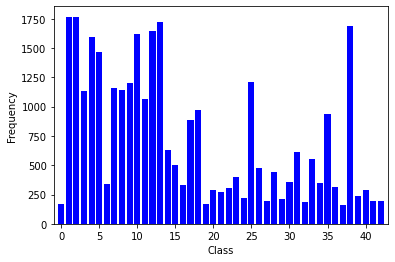

 
We can definitely see class bias issue as certain classes are under represented
 
 
Traffic Sign Images


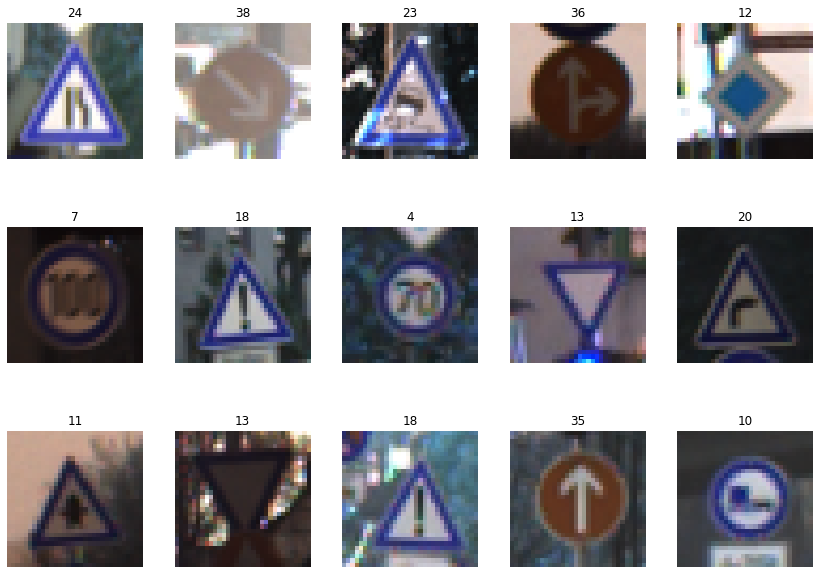

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts = True)
#print(np.asarray((unique_elements, counts_elements)))

plt.bar( np.arange(43), counts_elements, align='center',color='blue' )
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xlim([-1, 43])
plt.show()

# Visualize images
%matplotlib inline
fig, axs = plt.subplots(3,5, figsize=(15, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(15):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

# Benchmark Run
Create a model that can be used to train on the non-preprocessed data. This will be used as a comparision to our later results.

In [ ]:
import keras
from keras import regularizers
from keras.optimizers import SGD
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
import cv2

In [ ]:
# Simple 5 layer dense model
bench_model = Sequential()
bench_model.add(Dense(128, activation='relu', input_shape=(32*32*3,)))
bench_model.add(BatchNormalization())
bench_model.add(Dense(128, activation='relu'))
bench_model.add(BatchNormalization())
bench_model.add(Dropout(0.5))
bench_model.add(Dense(128, activation='relu'))
bench_model.add(BatchNormalization())
bench_model.add(Dropout(0.5))
bench_model.add(Dense(128, activation='relu'))
bench_model.add(BatchNormalization())
bench_model.add(Dense(n_classes, activation='softmax'))

In [ ]:
bench_model.summary()
bench_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               5

In [ ]:
# Reshape data for training
X_train_baseline = X_train.reshape(len(X_train), 32*32*3).astype('float32')
X_valid_baseline = X_valid.reshape(len(X_valid), 32*32*3).astype('float32')
y_train_baseline = keras.utils.to_categorical(y_train, n_classes)
y_valid_baseline = keras.utils.to_categorical(y_valid, n_classes)

In [ ]:
# Save best model
basepath= '/content/gdrive/My Drive/Colab Notebooks/SYDE 673/Project/model/'
filepath = basepath + 'benchmark_weights-{val_accuracy:.5f}.h5'
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=15),
    keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
]

In [ ]:
bench_model.fit(X_train_baseline, y_train_baseline, batch_size=128, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(X_valid_baseline, y_valid_baseline))

In [ ]:
# Reshape test data
X_test_baseline = X_test.reshape(len(X_test), 32*32*3).astype('float32')
y_test_baseline = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
# Import best model weights and run on test data
bench_model.load_weights('/content/gdrive/My Drive/Colab Notebooks/SYDE 673/Project/model/benchmark_weights-0.95639.h5')
bench_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Pred = bench_model.evaluate(X_test_baseline, y_test_baseline, verbose=0)
print("Benchmark Run")
print("%s- %.2f" % (bench_model.metrics_names[0], Pred[0]*100))
print("%s- %.2f" % (bench_model.metrics_names[1], Pred[1]*100))

Dense fully connected network results on the test data - Baseline 
 
loss- 53.80
accuracy- 88.68


# Data Augmentation

In [ ]:
#Data augmentation method from openCV tutorial: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations
from random import seed
from random import randint
seed(42)

def data_augment(image):
    rows= image.shape[0]
    cols = image.shape[1]
    rot_angle = randint(-10, 10)
    
    # Rotation by rot_angle
    M_rot = cv2.getRotationMatrix2D((cols/2,rows/2),rot_angle,1)
    
    # Translation
    tx = randint(-3, 3)
    ty = randint(-6, 6)
    M_trans = np.float32([[1,0,tx],[0,1,ty]])
    
    # Warp using M matricies
    img = cv2.warpAffine(image,M_rot,(cols,rows))
    img = cv2.warpAffine(img,M_trans,(cols,rows))

    return img

In [ ]:
# Augment dataset to 4000 imagaes per class

classes = 43
X_train_final = X_train
y_train_final = y_train
X_aug_1 = []
Y_aug_1 = []

for i in range(0,classes):
    
    class_records = np.where(y_train==i)[0].size
    max_records = 4000
    if class_records != max_records:
        ovr_sample = max_records - class_records
        samples = X_train[np.where(y_train==i)[0]]
        X_aug = []
        Y_aug = [i] * ovr_sample
        
        for x in range(ovr_sample):
            img = samples[x % class_records]
            trans_img = data_augment(img)
            X_aug.append(trans_img)
            
        X_train_final = np.concatenate((X_train_final, X_aug), axis=0)
        y_train_final = np.concatenate((y_train_final, Y_aug)) 
        
        Y_aug_1 = Y_aug_1 + Y_aug
        X_aug_1 = X_aug_1 + X_aug

## Re-Check Class Bias

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42]
 [4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
  4000]]


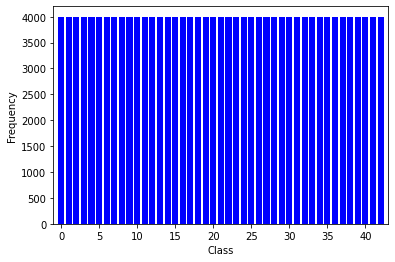

In [ ]:
unique_elements, counts_elements = np.unique(y_train_final, return_counts = True)
print(np.asarray((unique_elements, counts_elements)))

plt.bar( np.arange( 43 ), counts_elements, align='center',color='blue' )
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xlim([-1, 43])
plt.show()

In [ ]:
print(len(X_train))
print(len(X_train_final))
print(len(y_train))
print(len(y_train_final))

31367
172000
31367
172000


Let's view few images to understand our transformations


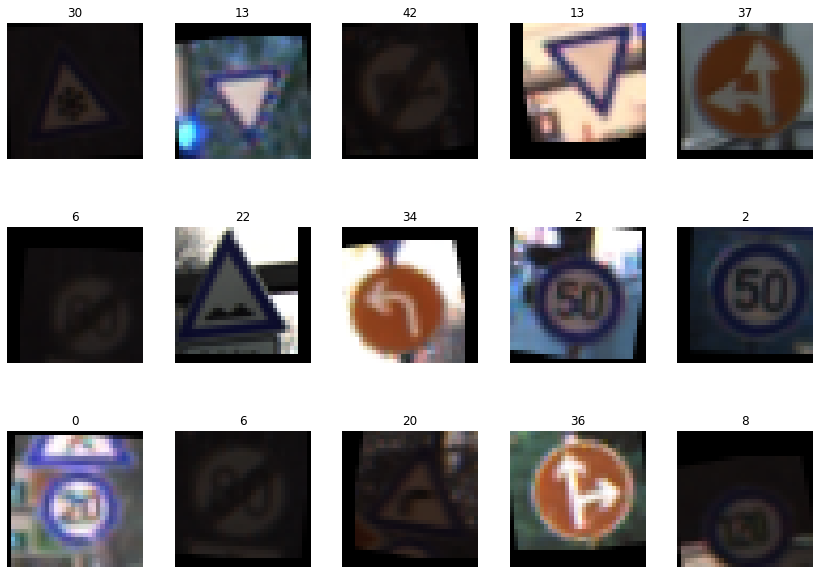

In [ ]:
print("Data Augmented images")
fig, axs = plt.subplots(3,5, figsize=(15, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(15):
    index = random.randint(0, len(X_aug_1))
    image = X_aug_1[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(Y_aug_1[index])

## Model Testing after Augmentation

In [ ]:
X_train_aug = X_train_final.reshape(len(X_train_final), 32*32*3).astype('float32')
X_valid_aug = X_valid.reshape(len(X_valid), 32*32*3).astype('float32')
y_train_aug = keras.utils.to_categorical(y_train_final, n_classes)
y_valid_aug = keras.utils.to_categorical(y_valid, n_classes)

In [ ]:
basepath= '/content/gdrive/My Drive/Colab Notebooks/SYDE 673/Project/model/'
filepath = basepath + 'aug_weights-{val_accuracy:.5f}.h5'
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=15),
    keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    #keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
bench_model.fit(X_train_aug, y_train_aug, batch_size=128, epochs=100, verbose=1,callbacks=my_callbacks,validation_data=(X_valid_aug, y_valid_aug))

Epoch 1/100
1344/1344 [==============================] - 14s 11ms/step - loss: 1.1188 - accuracy: 0.6537 - val_loss: 0.2358 - val_accuracy: 0.9342

Epoch 00001: val_accuracy improved from -inf to 0.93420, saving model to /content/gdrive/My Drive/Colab Notebooks/SYDE 673/Project/model/aug_weights-0.93420.h5
Epoch 2/100
1344/1344 [==============================] - 14s 11ms/step - loss: 1.0604 - accuracy: 0.6669 - val_loss: 0.2575 - val_accuracy: 0.9221

Epoch 00002: val_accuracy did not improve from 0.93420
Epoch 3/100
1344/1344 [==============================] - 15s 11ms/step - loss: 1.0491 - accuracy: 0.6702 - val_loss: 0.2472 - val_accuracy: 0.9269

Epoch 00003: val_accuracy did not improve from 0.93420
Epoch 4/100
1344/1344 [==============================] - 14s 11ms/step - loss: 1.0467 - accuracy: 0.6712 - val_loss: 0.2978 - val_accuracy: 0.9100

Epoch 00004: val_accuracy did not improve from 0.93420
Epoch 5/100
1344/1344 [==============================] - 15s 11ms/step - loss: 1.04

In [ ]:
X_test_aug = X_test.reshape(len(X_test), 32*32*3).astype('float32')
y_test_aug = keras.utils.to_categorical(y_test, n_classes)

In [ ]:
bench_model.load_weights('/content/gdrive/My Drive/Colab Notebooks/SYDE 673/Project/model/aug_weights-0.93420.h5')
bench_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Test best model on augmented data
Pred = bench_model.evaluate(X_test_aug, y_test_aug, verbose=0)
print("Run After Data Augmentation")
print("%s- %.2f" % (bench_model.metrics_names[0], Pred[0]*100))
print("%s- %.2f" % (bench_model.metrics_names[1], Pred[1]*100))

Dense fully connected network results on the test data - After Data Augmentation 
 
loss- 51.88
accuracy- 86.67


In [ ]:
#Test best model on original data
bench_model.load_weights('/content/gdrive/My Drive/Colab Notebooks/SYDE 673/Project/model/aug_weights-0.93420.h5')
bench_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Pred = bench_model.evaluate(X_test_baseline, y_test_baseline, verbose=0)
print("Model trained on augmented data, tested on original data ")
print("%s- %.2f" % (model.metrics_names[0], Pred[0]*100))
print("%s- %.2f" % (model.metrics_names[1], Pred[1]*100))

Dense fully connected network results on the test data - Baseline 
 
loss- 51.88
accuracy- 86.67


# Data Preprocessing

## Greyscaling

In [ ]:
# Image greyscaling
def gray_scale(image):
    return cv2.cvtColor(np.float32(image), cv2.COLOR_RGB2GRAY)

gray_images_data = list(map(gray_scale, X_train_final))

# View images
fig, axs = plt.subplots(3,5, figsize=(15, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(15):
    index = np.random.randint(0, len(gray_images_data))
    image = gray_images_data[index]
    axs[i].axis('off')
    axs[i].imshow(image,cmap='gray')
    axs[i].set_title(y_train_final[index])

## Local Histogram Equalization

 
 
Let's view few images after applying local histogram equilization and Gray scaling


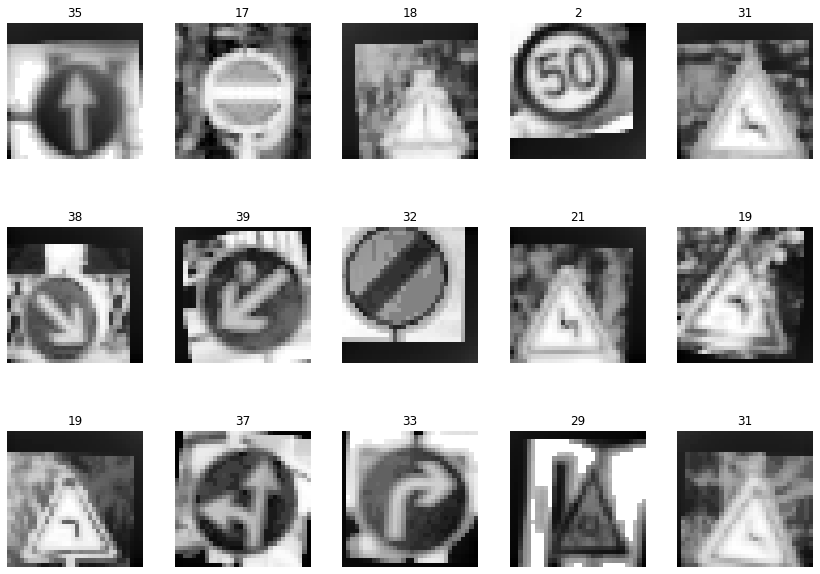

In [ ]:
import skimage.morphology as morp
from skimage.filters import rank
#References: https://www.programcreek.com/python/example/94371/skimage.morphology.disk, https://scikit-image.org/docs/dev/api/skimage.filters.rank.html 

def local_histogram_equalize(image):
    #Disk kernel
    k = morp.disk(30)
    img_local = rank.equalize(image, selem=k)
    return img_local

local_hist = np.array(list(map(local_histogram_equalize, gray_images_data)))

#View after LHE
fig, axs = plt.subplots(3,5, figsize=(15, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(15):
    index = np.random.randint(0, len(local_hist))
    image = local_hist[index]
    axs[i].axis('off')
    axs[i].imshow(image,cmap = 'gray')
    axs[i].set_title(y_train_final[index])


In [ ]:
local_hist[1].shape

In [ ]:
def preprocess(data):
    gray_images = list(map(gray_scale, data))
    print("grayscale complete")
    equalized_images = list(map(local_histogram_equalize, gray_images))
    print("equalization complete")
    n_training = data.shape
    normalized_images = np.zeros((n_training[0], n_training[1], n_training[2]))

    #Normalize images
    for i, img in enumerate(equalized_images):
        normalized_images[i] = np.divide(img,255)
    print("normalization complete")
    normalized_images = normalized_images[..., None]
    
    return normalized_images

### Apply Preprocessing Data

In [ ]:
X_train_preprocessed = preprocess(X_train_final)
X_valid_preprocessed = preprocess(X_valid)

In [ ]:
X_train_preprocessed_dn = X_train_preprocessed.reshape(len(X_train_preprocessed), 32*32*1).astype('float32')
X_valid_preprocessed_dn = X_valid_preprocessed.reshape(len(X_valid_preprocessed), 32*32*1).astype('float32')

In [ ]:
y_train_final_dn = keras.utils.to_categorical(y_train_final, n_classes)
y_valid_final_dn = keras.utils.to_categorical(y_valid, n_classes)

In [ ]:
print(X_train_preprocessed_dn.shape)
print(X_valid_preprocessed_dn.shape)
print(y_train_final_dn.shape)
print(y_valid_final_dn.shape)


In [ ]:
# save numpy array as npy file
from numpy import asarray
from numpy import save
# save to npy file
save('X_train_preprocessed_dn.npy', X_train_preprocessed_dn)
save('X_valid_preprocessed_dn.npy', X_valid_preprocessed_dn)
save('y_train_final_dn.npy', y_train_final_dn)
save('y_valid_final_dn.npy', y_valid_final_dn)

## Model testing after preprocessing

In [ ]:
from numpy import load
# load array if starting here
X_train_preprocessed_dn = load('X_train_preprocessed_dn.npy')
X_valid_preprocessed_dn = load('X_valid_preprocessed_dn.npy')
y_train_final_dn = load('y_train_final_dn.npy')
y_valid_final_dn = load('y_valid_final_dn.npy')

In [ ]:
#Setting up the model again, this time with input shape as 32*32*1

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(32*32*1,)))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
basepath= '/content/gdrive/My Drive/Colab Notebooks/SYDE 673/Project/model/'
filepath = basepath + 'greyscale_aug_weights-{val_accuracy:.5f}.h5'
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=15),
    keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    #keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
model.fit(X_train_preprocessed_dn, y_train_final_dn, batch_size=128, epochs=100, verbose=1,callbacks=my_callbacks,validation_data=(X_valid_preprocessed_dn, y_valid_final_dn))

In [ ]:
# Prepare the Test data with all the preprocessing
X_test_preprocessed = preprocess(X_test)
X_test_preprocessed_dn = X_test_preprocessed.reshape(len(X_test_preprocessed), 32*32*1).astype('float32')
y_test_final_dn = keras.utils.to_categorical(y_test, n_classes)

grayscale complete
equalization complete
normalization complete


In [ ]:
# Load best weights
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/SYDE 673/Project/model/greyscale_aug_weights-0.93050.h5')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
Pred = model.evaluate(X_test_preprocessed_dn, y_test_final_dn, verbose=0)
print("Model using augmented, greyscel, LHE data for training")
print("%s- %.2f%%" % (model.metrics_names[0], Pred[0]*100))
print("%s- %.2f%%" % (model.metrics_names[1], Pred[1]*100))

Dense fully connected network results on the test data
 
loss- 47.35%
accuracy- 85.99%


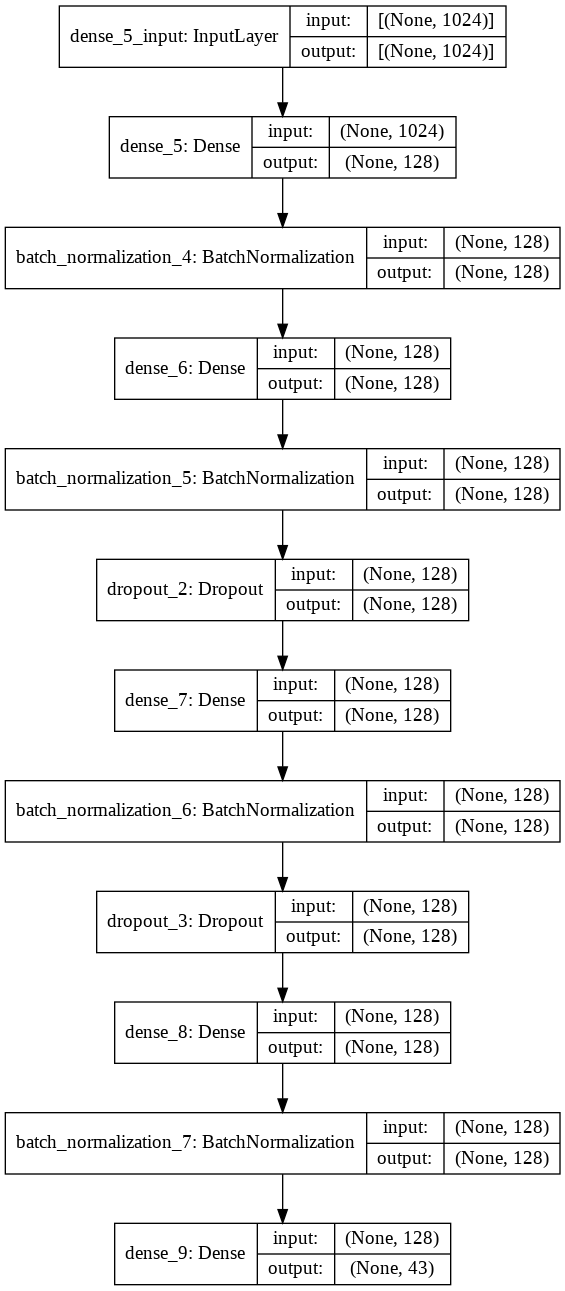

In [ ]:
from tensorflow.keras.utils import plot_model
# Plot the model for reference
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Create DenseNet model

I attempted to implement the DenseNet model for training, preliminary results showed I could get above 90% test accuracy on the dataset, although training time was so long I abandoned this method and focused on the basic dense network used above.

In [ ]:
import densenet

denseNet_model, model_name = densenet.DenseNet(input_shape=(32,32,1), dense_blocks=3, dense_layers=-1, growth_rate=12, nb_classes=n_classes, dropout_rate=0.2,
             bottleneck=False, compression=1.0, weight_decay=1e-4, depth=10)

ModuleNotFoundError: ignored

In [ ]:
denseNet_model.summary()

In [ ]:
denseNet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
filepath= '/content/gdrive/My Drive/Colab Notebooks/SYDE 673/Project/densenet/denseNet_weights-{val_accuracy:.5f}.h5'
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=3),
    keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
    #keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
denseNet_model.fit(X_train_preprocessed, y_train_final_dn, batch_size=128, epochs=16, verbose=1,callbacks=my_callbacks,validation_data=(X_valid_preprocessed, y_valid_final_dn))

Epoch 1/16
1344/1344 [==============================] - 415s 307ms/step - loss: 2.4932 - accuracy: 0.3540 - val_loss: 1.1095 - val_accuracy: 0.6790
Epoch 2/16
1344/1344 [==============================] - 420s 313ms/step - loss: 0.5841 - accuracy: 0.8838 - val_loss: 0.6458 - val_accuracy: 0.8568
Epoch 3/16
1344/1344 [==============================] - 418s 311ms/step - loss: 0.3433 - accuracy: 0.9496 - val_loss: 0.2970 - val_accuracy: 0.9588
Epoch 4/16
1344/1344 [==============================] - 417s 310ms/step - loss: 0.2820 - accuracy: 0.9663 - val_loss: 0.3065 - val_accuracy: 0.9540
Epoch 5/16
1344/1344 [==============================] - 414s 308ms/step - loss: 0.2552 - accuracy: 0.9737 - val_loss: 0.3526 - val_accuracy: 0.9394
Epoch 6/16
1344/1344 [==============================] - 415s 309ms/step - loss: 0.2354 - accuracy: 0.9788 - val_loss: 0.3137 - val_accuracy: 0.9490


In [ ]:
denseNet_model.load_weights('/content/gdrive/My Drive/Colab Notebooks/SYDE 673/Project/model/')
Pred = denseNet_model.evaluate(X_test_preprocessed, y_test_final_dn, verbose=0)

print("DenseNet results")
print("%s- %.2f%%" % (model.metrics_names[0], Pred[0]*100))
print("%s- %.2f%%" % (model.metrics_names[1], Pred[1]*100))

Dense fully connected network results on the test data
 
loss- 47.50%
accuracy- 90.54%


# References

marinovik, "Recognizing Traffic Signals with Keras CNN", 2021, https://www.kaggle.com/marinovik/recognizing-traffic-signals-with-keras-cnn

OpenCV Tutorials, "Geometric Transformations of Images", 2013, https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations